In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#NEED THIS TO RUN DEEP LEARNING
tf.config.set_visible_devices([], 'GPU')

# Data Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 3026 files belonging to 2 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 341 files belonging to 2 classes.


In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 349 files belonging to 2 classes.


# Model Training

In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.6))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
#Output Layer (Unit got 36 because cot 36 classes in the dataset)
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))


In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [7]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
training_history = cnn.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10


2023-10-29 19:56:07.028710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:56:07.839389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:05 - loss: 320.6783 - accuracy: 0.5104

2023-10-29 19:56:12.290069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:14 - loss: 142.7469 - accuracy: 0.5625

2023-10-29 19:56:16.325642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:11 - loss: 91.8139 - accuracy: 0.5710 

2023-10-29 19:56:19.762589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:06 - loss: 77.8602 - accuracy: 0.5962

2023-10-29 19:56:21.445172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/95 [====>.........................] - ETA: 59s - loss: 56.8104 - accuracy: 0.5729 

2023-10-29 19:56:24.115423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 52s - loss: 41.2130 - accuracy: 0.5950

2023-10-29 19:56:29.470593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:56:29.717785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 50s - loss: 35.6882 - accuracy: 0.5948

2023-10-29 19:56:32.507775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 49s - loss: 32.4093 - accuracy: 0.6055

2023-10-29 19:56:34.936328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 47s - loss: 31.4678 - accuracy: 0.6032

2023-10-29 19:56:36.739815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 44s - loss: 27.4815 - accuracy: 0.6044

2023-10-29 19:56:39.930762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 41s - loss: 24.9277 - accuracy: 0.6176

2023-10-29 19:56:43.056479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 39s - loss: 23.3285 - accuracy: 0.6174

2023-10-29 19:56:46.821506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 37s - loss: 21.9661 - accuracy: 0.6211

2023-10-29 19:56:48.809967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 33s - loss: 19.9798 - accuracy: 0.6185

2023-10-29 19:56:52.734518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:56:52.759565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 32s - loss: 19.6231 - accuracy: 0.6181

2023-10-29 19:56:53.272894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 22s - loss: 15.9536 - accuracy: 0.6189

2023-10-29 19:57:05.470835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 21s - loss: 15.5144 - accuracy: 0.6200

2023-10-29 19:57:06.613146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 17s - loss: 14.6990 - accuracy: 0.6199

2023-10-29 19:57:09.694845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 12s - loss: 13.4866 - accuracy: 0.6184

2023-10-29 19:57:15.636837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 11.5865 - accuracy: 0.6183

2023-10-29 19:57:27.468243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:57:27.907493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 88s 861ms/step - loss: 11.5865 - accuracy: 0.6183 - val_loss: 0.6598 - val_accuracy: 0.6862
Epoch 2/10


2023-10-29 19:57:34.110977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:57:34.702517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:08 - loss: 0.5398 - accuracy: 0.7812

2023-10-29 19:57:38.830048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:15 - loss: 0.6482 - accuracy: 0.7277

2023-10-29 19:57:42.740337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:06 - loss: 0.6581 - accuracy: 0.7102

2023-10-29 19:57:45.651718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:04 - loss: 0.6680 - accuracy: 0.6851

2023-10-29 19:57:47.128538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/95 [====>.........................] - ETA: 58s - loss: 0.6503 - accuracy: 0.6949

2023-10-29 19:57:49.322739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 49s - loss: 0.7194 - accuracy: 0.6975

2023-10-29 19:57:54.771912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 49s - loss: 0.7137 - accuracy: 0.6995

2023-10-29 19:57:55.283640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 48s - loss: 0.7249 - accuracy: 0.6983

2023-10-29 19:57:58.137219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 47s - loss: 0.7184 - accuracy: 0.6963

2023-10-29 19:58:00.819321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 46s - loss: 0.7164 - accuracy: 0.6960

2023-10-29 19:58:02.669402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 43s - loss: 0.7040 - accuracy: 0.6965

2023-10-29 19:58:05.735462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 41s - loss: 0.6943 - accuracy: 0.6987

2023-10-29 19:58:09.185840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 39s - loss: 0.6907 - accuracy: 0.6986

2023-10-29 19:58:12.686039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 37s - loss: 0.6857 - accuracy: 0.6979

2023-10-29 19:58:14.678490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 32s - loss: 0.6907 - accuracy: 0.6987

2023-10-29 19:58:18.576312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:58:18.601116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 32s - loss: 0.6871 - accuracy: 0.7008

2023-10-29 19:58:18.985409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 22s - loss: 0.7061 - accuracy: 0.6982

2023-10-29 19:58:30.742012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 20s - loss: 0.7854 - accuracy: 0.6970

2023-10-29 19:58:31.799203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 17s - loss: 0.7912 - accuracy: 0.6896

2023-10-29 19:58:35.093654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 12s - loss: 0.7806 - accuracy: 0.6879

2023-10-29 19:58:41.422958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.7570 - accuracy: 0.6877

2023-10-29 19:58:53.376892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:58:53.750464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 86s 856ms/step - loss: 0.7570 - accuracy: 0.6877 - val_loss: 0.6953 - val_accuracy: 0.6862
Epoch 3/10


2023-10-29 19:59:00.249041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:59:01.073654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:09 - loss: 0.9963 - accuracy: 0.7292

2023-10-29 19:59:05.237914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:23 - loss: 0.7823 - accuracy: 0.7188

2023-10-29 19:59:09.556896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:15 - loss: 0.7182 - accuracy: 0.7244

2023-10-29 19:59:12.963004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:10 - loss: 0.7329 - accuracy: 0.7091

2023-10-29 19:59:14.496889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/95 [====>.........................] - ETA: 1:02 - loss: 0.7264 - accuracy: 0.7083

2023-10-29 19:59:17.274258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/95 [=======>......................] - ETA: 52s - loss: 0.6934 - accuracy: 0.7260

2023-10-29 19:59:22.546025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:59:22.912692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 52s - loss: 0.7011 - accuracy: 0.7101

2023-10-29 19:59:25.752066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 49s - loss: 0.6879 - accuracy: 0.7139

2023-10-29 19:59:28.411540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 48s - loss: 0.6850 - accuracy: 0.7150

2023-10-29 19:59:30.419000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 45s - loss: 0.6767 - accuracy: 0.7048

2023-10-29 19:59:33.338111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 41s - loss: 0.6801 - accuracy: 0.7009

2023-10-29 19:59:35.973035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 40s - loss: 0.6818 - accuracy: 0.7007

2023-10-29 19:59:40.107336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 38s - loss: 0.6744 - accuracy: 0.7018

2023-10-29 19:59:41.977936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 33s - loss: 0.6729 - accuracy: 0.6934

2023-10-29 19:59:44.828137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 19:59:44.930839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 32s - loss: 0.6727 - accuracy: 0.6933

2023-10-29 19:59:45.234700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 21s - loss: 0.6591 - accuracy: 0.6978

2023-10-29 19:59:54.743808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 19s - loss: 0.6566 - accuracy: 0.6979

2023-10-29 19:59:56.001459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 16s - loss: 0.6885 - accuracy: 0.6965

2023-10-29 19:59:59.086990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 11s - loss: 0.6905 - accuracy: 0.6938

2023-10-29 20:00:05.154042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.6950

2023-10-29 20:00:16.423147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:00:16.934584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 83s 827ms/step - loss: 0.6802 - accuracy: 0.6950 - val_loss: 0.5721 - val_accuracy: 0.6921
Epoch 4/10


2023-10-29 20:00:23.719773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:00:24.497307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:08 - loss: 0.5483 - accuracy: 0.7500

2023-10-29 20:00:28.887300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:18 - loss: 0.5482 - accuracy: 0.7500

2023-10-29 20:00:33.020698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:10 - loss: 0.5507 - accuracy: 0.7500

2023-10-29 20:00:36.373626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:07 - loss: 0.5980 - accuracy: 0.7188

2023-10-29 20:00:38.176220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/95 [====>.........................] - ETA: 1:01 - loss: 0.6054 - accuracy: 0.7118

2023-10-29 20:00:41.174690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 53s - loss: 0.6172 - accuracy: 0.7038

2023-10-29 20:00:46.560436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 53s - loss: 0.6158 - accuracy: 0.7055

2023-10-29 20:00:46.939661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 52s - loss: 0.6166 - accuracy: 0.7069

2023-10-29 20:00:49.618244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 49s - loss: 0.6193 - accuracy: 0.6973

2023-10-29 20:00:52.261389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 48s - loss: 0.6194 - accuracy: 0.6932

2023-10-29 20:00:53.989048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 46s - loss: 0.6887 - accuracy: 0.6817

2023-10-29 20:00:57.350794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 42s - loss: 0.6809 - accuracy: 0.6793

2023-10-29 20:01:00.460424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/95 [=============>................] - ETA: 40s - loss: 0.6736 - accuracy: 0.6821

2023-10-29 20:01:04.315098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 38s - loss: 0.6717 - accuracy: 0.6816

2023-10-29 20:01:06.197938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 33s - loss: 0.6625 - accuracy: 0.6851

2023-10-29 20:01:09.624163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:01:09.643914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 32s - loss: 0.6599 - accuracy: 0.6875

2023-10-29 20:01:09.898613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 22s - loss: 0.6503 - accuracy: 0.6898

2023-10-29 20:01:21.886954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 21s - loss: 0.6471 - accuracy: 0.6920

2023-10-29 20:01:23.045878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 17s - loss: 0.6409 - accuracy: 0.6952

2023-10-29 20:01:25.907285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 12s - loss: 0.6616 - accuracy: 0.6926

2023-10-29 20:01:31.739739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6953

2023-10-29 20:01:42.586394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:01:42.949084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 86s 848ms/step - loss: 0.6617 - accuracy: 0.6953 - val_loss: 0.6387 - val_accuracy: 0.6862
Epoch 5/10


2023-10-29 20:01:49.453064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:01:50.163700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/95 [..............................] - ETA: 1:10 - loss: 0.6738 - accuracy: 0.7656

2023-10-29 20:01:54.085422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:13 - loss: 0.6075 - accuracy: 0.7098

2023-10-29 20:01:58.222332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:07 - loss: 0.5985 - accuracy: 0.7045

2023-10-29 20:02:01.210733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:04 - loss: 0.5924 - accuracy: 0.7115

2023-10-29 20:02:02.830395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/95 [====>.........................] - ETA: 59s - loss: 0.5859 - accuracy: 0.7151 

2023-10-29 20:02:05.609103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 50s - loss: 0.5735 - accuracy: 0.7300

2023-10-29 20:02:10.604722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 49s - loss: 0.5686 - accuracy: 0.7356

2023-10-29 20:02:10.958269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 49s - loss: 0.5760 - accuracy: 0.7295

2023-10-29 20:02:13.839816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 47s - loss: 0.5855 - accuracy: 0.7246

2023-10-29 20:02:16.308509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 46s - loss: 0.5885 - accuracy: 0.7225

2023-10-29 20:02:18.103785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 43s - loss: 0.5901 - accuracy: 0.7229

2023-10-29 20:02:21.028349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/95 [===========>..................] - ETA: 41s - loss: 0.5931 - accuracy: 0.7165

2023-10-29 20:02:23.783198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 38s - loss: 0.5886 - accuracy: 0.7188

2023-10-29 20:02:27.827889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 36s - loss: 0.5912 - accuracy: 0.7129

2023-10-29 20:02:29.711440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 32s - loss: 0.5884 - accuracy: 0.7146

2023-10-29 20:02:33.580155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:02:33.584725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:02:33.717664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 21s - loss: 0.5869 - accuracy: 0.7150

2023-10-29 20:02:43.505735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 19s - loss: 0.5870 - accuracy: 0.7156

2023-10-29 20:02:44.880912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 16s - loss: 0.5915 - accuracy: 0.7106

2023-10-29 20:02:47.921724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 11s - loss: 0.5947 - accuracy: 0.7102

2023-10-29 20:02:53.953528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.7108

2023-10-29 20:03:04.544082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:03:04.976378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 82s 807ms/step - loss: 0.5949 - accuracy: 0.7108 - val_loss: 0.6012 - val_accuracy: 0.7507
Epoch 6/10


2023-10-29 20:03:11.038221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:03:11.696979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:01 - loss: 0.6179 - accuracy: 0.6771

2023-10-29 20:03:15.566547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:10 - loss: 0.6250 - accuracy: 0.7098

2023-10-29 20:03:19.041666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:04 - loss: 0.6047 - accuracy: 0.7074

2023-10-29 20:03:22.328703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:00 - loss: 0.6385 - accuracy: 0.7019

2023-10-29 20:03:23.839237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/95 [====>.........................] - ETA: 57s - loss: 0.6035 - accuracy: 0.7292

2023-10-29 20:03:26.908484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 48s - loss: 0.5957 - accuracy: 0.7250

2023-10-29 20:03:31.707075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 49s - loss: 0.5956 - accuracy: 0.7272

2023-10-29 20:03:32.147957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 48s - loss: 0.5903 - accuracy: 0.7263

2023-10-29 20:03:34.796676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 46s - loss: 0.5951 - accuracy: 0.7275

2023-10-29 20:03:37.201447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 45s - loss: 0.5942 - accuracy: 0.7263

2023-10-29 20:03:38.672102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 41s - loss: 0.5896 - accuracy: 0.7262

2023-10-29 20:03:41.020831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 37s - loss: 0.5935 - accuracy: 0.7292

2023-10-29 20:03:43.431845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 35s - loss: 0.5936 - accuracy: 0.7285

2023-10-29 20:03:46.719794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 34s - loss: 0.5885 - accuracy: 0.7305

2023-10-29 20:03:48.804520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 30s - loss: 0.5869 - accuracy: 0.7300

2023-10-29 20:03:52.490993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:03:52.521778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:03:52.648852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/95 [====================>.........] - ETA: 20s - loss: 0.5904 - accuracy: 0.7252

2023-10-29 20:04:04.579354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



69/95 [====================>.........] - ETA: 19s - loss: 0.5903 - accuracy: 0.7242

2023-10-29 20:04:06.148317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 16s - loss: 0.5894 - accuracy: 0.7247

2023-10-29 20:04:09.059954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/95 [========================>.....] - ETA: 10s - loss: 0.6706 - accuracy: 0.7188

2023-10-29 20:04:15.261666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.7188

2023-10-29 20:04:26.430340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:04:26.835272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 82s 819ms/step - loss: 0.6578 - accuracy: 0.7188 - val_loss: 0.5257 - val_accuracy: 0.7302
Epoch 7/10


2023-10-29 20:04:33.485366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:04:34.146876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:04 - loss: 0.6133 - accuracy: 0.7292

2023-10-29 20:04:38.342963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:17 - loss: 0.5460 - accuracy: 0.7411

2023-10-29 20:04:42.602171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:11 - loss: 0.5445 - accuracy: 0.7330

2023-10-29 20:04:45.902743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:08 - loss: 0.5677 - accuracy: 0.7260

2023-10-29 20:04:47.293654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/95 [====>.........................] - ETA: 1:00 - loss: 0.5352 - accuracy: 0.7518

2023-10-29 20:04:49.648360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 49s - loss: 0.5433 - accuracy: 0.7588

2023-10-29 20:04:54.692749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 50s - loss: 0.5507 - accuracy: 0.7524

2023-10-29 20:04:55.084497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 49s - loss: 0.5468 - accuracy: 0.7543

2023-10-29 20:04:57.900492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 47s - loss: 0.5365 - accuracy: 0.7578

2023-10-29 20:05:00.518979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 46s - loss: 0.5427 - accuracy: 0.7528

2023-10-29 20:05:02.295615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/95 [==========>...................] - ETA: 45s - loss: 0.5457 - accuracy: 0.7475

2023-10-29 20:05:05.443832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/95 [===========>..................] - ETA: 41s - loss: 0.5562 - accuracy: 0.7401

2023-10-29 20:05:08.440095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 39s - loss: 0.5522 - accuracy: 0.7396

2023-10-29 20:05:12.057331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 36s - loss: 0.5494 - accuracy: 0.7396

2023-10-29 20:05:14.023127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 32s - loss: 0.5588 - accuracy: 0.7412

2023-10-29 20:05:17.869493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:05:17.882159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 32s - loss: 0.5694 - accuracy: 0.7384

2023-10-29 20:05:18.156455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/95 [====================>.........] - ETA: 19s - loss: 0.5784 - accuracy: 0.7307

2023-10-29 20:05:25.396979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/95 [=====================>........] - ETA: 17s - loss: 0.5778 - accuracy: 0.7317

2023-10-29 20:05:25.933989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


74/95 [======================>.......] - ETA: 14s - loss: 0.5755 - accuracy: 0.7318

2023-10-29 20:05:27.262765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/95 [========================>.....] - ETA: 9s - loss: 0.5805 - accuracy: 0.7276

2023-10-29 20:05:29.560308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


94/95 [============================>.] - ETA: 0s - loss: 0.5897 - accuracy: 0.7264

2023-10-29 20:05:33.650648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:05:33.825791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 64s 624ms/step - loss: 0.5895 - accuracy: 0.7264 - val_loss: 0.5277 - val_accuracy: 0.7830
Epoch 8/10


2023-10-29 20:05:36.676684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:05:36.975730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 27s - loss: 0.5255 - accuracy: 0.7083

2023-10-29 20:05:38.734804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 32s - loss: 0.5196 - accuracy: 0.7188

2023-10-29 20:05:40.447258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/95 [==>...........................] - ETA: 27s - loss: 0.5361 - accuracy: 0.7292

2023-10-29 20:05:41.690103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/95 [===>..........................] - ETA: 26s - loss: 0.5458 - accuracy: 0.7210

2023-10-29 20:05:42.311882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/95 [====>.........................] - ETA: 22s - loss: 0.5366 - accuracy: 0.7344

2023-10-29 20:05:43.151382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/95 [=======>......................] - ETA: 19s - loss: 0.5337 - accuracy: 0.7296

2023-10-29 20:05:45.047198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:05:45.153514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 18s - loss: 0.5431 - accuracy: 0.7220

2023-10-29 20:05:46.179230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/95 [=========>....................] - ETA: 17s - loss: 0.5509 - accuracy: 0.7188

2023-10-29 20:05:47.138964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



34/95 [=========>....................] - ETA: 18s - loss: 0.5582 - accuracy: 0.7142

2023-10-29 20:05:47.864377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 16s - loss: 0.5609 - accuracy: 0.7171

2023-10-29 20:05:48.883656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 15s - loss: 0.5528 - accuracy: 0.7225

2023-10-29 20:05:50.015843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/95 [=============>................] - ETA: 14s - loss: 0.5624 - accuracy: 0.7249

2023-10-29 20:05:51.543911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/95 [==============>...............] - ETA: 13s - loss: 0.5647 - accuracy: 0.7219

2023-10-29 20:05:52.318423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/95 [================>.............] - ETA: 12s - loss: 0.5714 - accuracy: 0.7205

2023-10-29 20:05:53.795830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:05:53.797848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:05:53.873871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/95 [====================>.........] - ETA: 9s - loss: 0.5702 - accuracy: 0.7201

2023-10-29 20:06:00.998322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



69/95 [====================>.........] - ETA: 9s - loss: 0.5704 - accuracy: 0.7192

2023-10-29 20:06:01.920159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 7s - loss: 0.5716 - accuracy: 0.7196

2023-10-29 20:06:03.951644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 5s - loss: 0.5674 - accuracy: 0.7215

2023-10-29 20:06:08.072597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.5605 - accuracy: 0.7254

2023-10-29 20:06:15.822733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:06:16.078686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 44s 436ms/step - loss: 0.5605 - accuracy: 0.7254 - val_loss: 0.5127 - val_accuracy: 0.7273
Epoch 9/10


2023-10-29 20:06:20.725638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:06:21.251417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/95 [..............................] - ETA: 46s - loss: 0.5761 - accuracy: 0.7812 

2023-10-29 20:06:23.990170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 50s - loss: 0.7662 - accuracy: 0.7902

2023-10-29 20:06:26.929195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/95 [==>...........................] - ETA: 45s - loss: 0.6803 - accuracy: 0.7526

2023-10-29 20:06:29.043489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/95 [===>..........................] - ETA: 43s - loss: 0.6631 - accuracy: 0.7548

2023-10-29 20:06:30.124922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/95 [====>.........................] - ETA: 41s - loss: 0.6210 - accuracy: 0.7482

2023-10-29 20:06:32.004412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 34s - loss: 0.5817 - accuracy: 0.7575

2023-10-29 20:06:35.676125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 35s - loss: 0.5791 - accuracy: 0.7572

2023-10-29 20:06:35.943586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 34s - loss: 0.5694 - accuracy: 0.7565

2023-10-29 20:06:38.153875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 34s - loss: 0.5698 - accuracy: 0.7490

2023-10-29 20:06:40.297237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 33s - loss: 0.5677 - accuracy: 0.7491

2023-10-29 20:06:41.700924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 32s - loss: 0.5610 - accuracy: 0.7516

2023-10-29 20:06:44.363424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 30s - loss: 0.5515 - accuracy: 0.7552

2023-10-29 20:06:46.776005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 29s - loss: 0.5466 - accuracy: 0.7590

2023-10-29 20:06:49.948518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 28s - loss: 0.5431 - accuracy: 0.7591

2023-10-29 20:06:52.003992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 25s - loss: 0.5480 - accuracy: 0.7541

2023-10-29 20:06:55.374068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:06:55.385069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 25s - loss: 0.5473 - accuracy: 0.7535

2023-10-29 20:06:55.804578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 18s - loss: 0.5491 - accuracy: 0.7491

2023-10-29 20:07:06.667011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 16s - loss: 0.5502 - accuracy: 0.7477

2023-10-29 20:07:07.726565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 14s - loss: 0.5480 - accuracy: 0.7479

2023-10-29 20:07:10.329238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/95 [========================>.....] - ETA: 9s - loss: 0.5614 - accuracy: 0.7441 

2023-10-29 20:07:15.841421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.5598 - accuracy: 0.7416

2023-10-29 20:07:26.346437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:07:26.727298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - 72s 717ms/step - loss: 0.5598 - accuracy: 0.7416 - val_loss: 0.5234 - val_accuracy: 0.7566
Epoch 10/10


2023-10-29 20:07:33.027149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:07:33.698905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/95 [..............................] - ETA: 1:03 - loss: 0.6014 - accuracy: 0.7396

2023-10-29 20:07:37.792392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/95 [=>............................] - ETA: 1:13 - loss: 0.5166 - accuracy: 0.7857

2023-10-29 20:07:41.505535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/95 [==>...........................] - ETA: 1:05 - loss: 0.5919 - accuracy: 0.7585

2023-10-29 20:07:44.590438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/95 [===>..........................] - ETA: 1:03 - loss: 0.6039 - accuracy: 0.7572

2023-10-29 20:07:46.200508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/95 [====>.........................] - ETA: 56s - loss: 0.5943 - accuracy: 0.7465

2023-10-29 20:07:48.809012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/95 [======>.......................] - ETA: 49s - loss: 0.5750 - accuracy: 0.7600

2023-10-29 20:07:54.027142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



26/95 [=======>......................] - ETA: 49s - loss: 0.5748 - accuracy: 0.7524

2023-10-29 20:07:54.383747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/95 [========>.....................] - ETA: 48s - loss: 0.5652 - accuracy: 0.7511

2023-10-29 20:07:56.867674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/95 [=========>....................] - ETA: 46s - loss: 0.5507 - accuracy: 0.7588

2023-10-29 20:07:59.423816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



33/95 [=========>....................] - ETA: 45s - loss: 0.5468 - accuracy: 0.7623

2023-10-29 20:08:01.154055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/95 [===========>..................] - ETA: 42s - loss: 0.5549 - accuracy: 0.7484

2023-10-29 20:08:03.769205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/95 [============>.................] - ETA: 39s - loss: 0.5539 - accuracy: 0.7530

2023-10-29 20:08:06.487853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/95 [=============>................] - ETA: 37s - loss: 0.5528 - accuracy: 0.7542

2023-10-29 20:08:10.007037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/95 [==============>...............] - ETA: 35s - loss: 0.5699 - accuracy: 0.7526

2023-10-29 20:08:11.632063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/95 [===============>..............] - ETA: 31s - loss: 0.5692 - accuracy: 0.7494

2023-10-29 20:08:15.397990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:08:15.431680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



54/95 [================>.............] - ETA: 30s - loss: 0.5649 - accuracy: 0.7523

2023-10-29 20:08:15.826009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/95 [====================>.........] - ETA: 20s - loss: 0.5664 - accuracy: 0.7481

2023-10-29 20:08:26.211183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/95 [====================>.........] - ETA: 19s - loss: 0.5653 - accuracy: 0.7477

2023-10-29 20:08:27.427975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/95 [======================>.......] - ETA: 16s - loss: 0.5635 - accuracy: 0.7453

2023-10-29 20:08:30.366845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/95 [========================>.....] - ETA: 10s - loss: 0.5554 - accuracy: 0.7454

2023-10-29 20:08:34.796427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


95/95 [==============================] - ETA: 0s - loss: 0.5606 - accuracy: 0.7455

2023-10-29 20:08:41.853736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 20:08:42.047623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



95/95 [==============================] - 73s 719ms/step - loss: 0.5606 - accuracy: 0.7455 - val_loss: 0.5474 - val_accuracy: 0.7419


In [9]:
cnn.save('trained_model.h5')

/Users/HP/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
#Recording History
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [11]:
training_history.history

{'loss': [11.586541175842285,
  0.7569936513900757,
  0.6802031397819519,
  0.6617164611816406,
  0.5948778390884399,
  0.657832682132721,
  0.5895021557807922,
  0.560509979724884,
  0.5597844123840332,
  0.5605911612510681],
 'accuracy': [0.6183080077171326,
  0.6877065300941467,
  0.6949768662452698,
  0.6953073143959045,
  0.7108393907546997,
  0.7187706828117371,
  0.7263714671134949,
  0.7253800630569458,
  0.7415730357170105,
  0.7455386519432068],
 'val_loss': [0.6598057746887207,
  0.6952553391456604,
  0.5720716714859009,
  0.6387135982513428,
  0.6012245416641235,
  0.5256908535957336,
  0.5277483463287354,
  0.5127092003822327,
  0.5233571529388428,
  0.5473713874816895],
 'val_accuracy': [0.6862170100212097,
  0.6862170100212097,
  0.6920821070671082,
  0.6862170100212097,
  0.7507331371307373,
  0.7302052974700928,
  0.7829912304878235,
  0.7272727489471436,
  0.7565982341766357,
  0.7419354915618896]}

In [14]:
print('Training set accuracy: {} %'.format(training_history.history['accuracy'][-1]*100))

Training set accuracy: 74.55386519432068 %


In [15]:
print('Validation set accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 74.19354915618896 %


# Accuracy Visualization

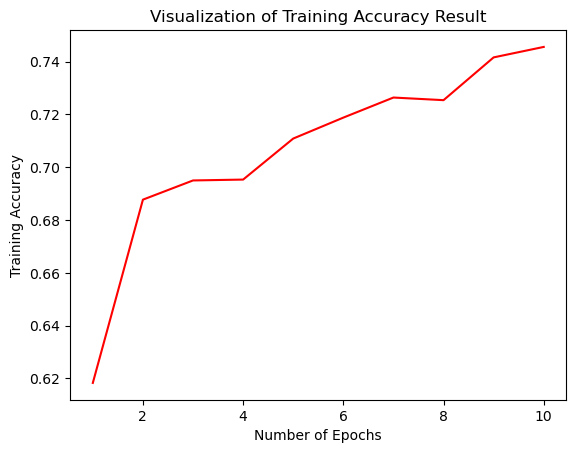

In [16]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color ='red')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

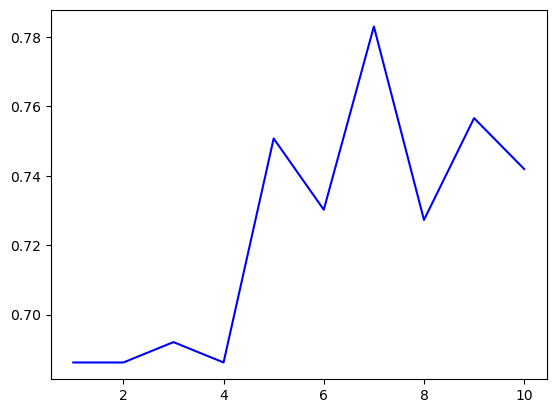

In [17]:
# Assuming 'epochs' and 'training_history' are correctly defined and contain data
# Convert any potential generators to lists or arrays
epochs = list(epochs)
val_accuracy = list(training_history.history['val_accuracy'])

# Now, you can plot the data
plt.plot(epochs, val_accuracy, color='blue')
plt.show()


In [ ]:
#Hyperparameter Tuning

# Predictions for fruits or vegetables

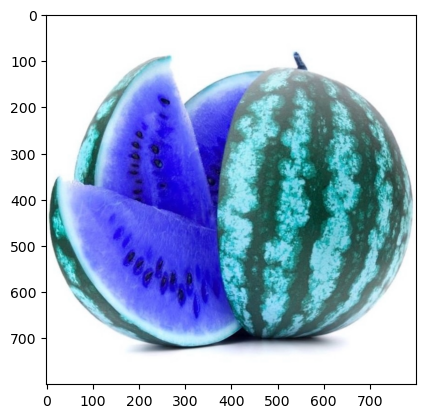

In [96]:
import cv2
image_path= "/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/test/Fruits/watermelon/Image_6.jpg"
img = cv2.imread(image_path)
plt.imshow(img)

In [97]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

# # Assuming you have a list of class labels, you can get the predicted class label
# class_labels = ["Fruits", "Vegetables"] 

# category_index = np.argmax(predictions)  # Get the index of the main category
# class_index = np.argmax(predictions)

# predicted_class = class_labels[class_index]

# print(f"The predicted category is: {predicted_class}")


1/1 [==============================] - 0s 14ms/step


In [98]:
print(predictions)

[[0.4409621 0.5590379]]


In [99]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index)

(array([1]),)


In [100]:
#Single Prediction
print('it is {}'.format(test_set.class_names[result_index[0][0]]))

it is Vegetables


# Improving the Model

In [86]:
cnn1 = tf.keras.models.Sequential()
cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn1.add(tf.keras.layers.Dense(units=256,activation='relu'))

cnn1.add(tf.keras.layers.Dropout(0.6))

#Output Layer (Unit got 36 because cot 36 classes in the dataset)
cnn1.add(tf.keras.layers.Dense(units=2,activation='softmax'))


In [87]:
cnn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
training_history_1 = cnn1.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10


2023-10-29 21:12:18.493815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:19.510422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 27.1459 - accuracy: 0.5330

2023-10-29 21:12:22.910711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:23.065592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 423ms/step - loss: 27.1459 - accuracy: 0.5330 - val_loss: 1.6666 - val_accuracy: 0.3138
Epoch 2/10


2023-10-29 21:12:25.371792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:26.368366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 1.0112 - accuracy: 0.5731

2023-10-29 21:12:29.621920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:29.769183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 413ms/step - loss: 1.0112 - accuracy: 0.5731 - val_loss: 0.6286 - val_accuracy: 0.7214
Epoch 3/10


2023-10-29 21:12:32.060382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:33.049371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.6447

2023-10-29 21:12:36.329172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:36.479297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 418ms/step - loss: 0.6723 - accuracy: 0.6447 - val_loss: 0.5449 - val_accuracy: 0.7273
Epoch 4/10


2023-10-29 21:12:38.810395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:39.804061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.5477 - accuracy: 0.6963

2023-10-29 21:12:43.112492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:43.260120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 418ms/step - loss: 0.5477 - accuracy: 0.6963 - val_loss: 0.5005 - val_accuracy: 0.7331
Epoch 5/10


2023-10-29 21:12:45.537094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:46.516254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.5023 - accuracy: 0.7622

2023-10-29 21:12:49.755339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:49.904562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 411ms/step - loss: 0.5023 - accuracy: 0.7622 - val_loss: 0.3796 - val_accuracy: 0.8094
Epoch 6/10


2023-10-29 21:12:52.188618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:53.204208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.3939 - accuracy: 0.8510

2023-10-29 21:12:56.485759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:56.619762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 417ms/step - loss: 0.3939 - accuracy: 0.8510 - val_loss: 0.3385 - val_accuracy: 0.8768
Epoch 7/10


2023-10-29 21:12:58.923920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:12:59.896509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.3426 - accuracy: 0.8797

2023-10-29 21:13:03.154549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:03.305745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 417ms/step - loss: 0.3426 - accuracy: 0.8797 - val_loss: 0.3315 - val_accuracy: 0.9003
Epoch 8/10


2023-10-29 21:13:05.628057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:06.605437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.3018 - accuracy: 0.8911

2023-10-29 21:13:09.941342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:10.098026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 420ms/step - loss: 0.3018 - accuracy: 0.8911 - val_loss: 0.2434 - val_accuracy: 0.9062
Epoch 9/10


2023-10-29 21:13:12.394667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:13.384153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.8940

2023-10-29 21:13:16.710932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:16.859113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 7s 424ms/step - loss: 0.2124 - accuracy: 0.8940 - val_loss: 0.1812 - val_accuracy: 0.9238
Epoch 10/10


2023-10-29 21:13:19.232019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:20.250596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - ETA: 0s - loss: 0.1854 - accuracy: 0.9370

2023-10-29 21:13:23.633048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-29 21:13:23.776369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



11/11 [==============================] - 7s 427ms/step - loss: 0.1854 - accuracy: 0.9370 - val_loss: 0.2158 - val_accuracy: 0.9413


In [89]:
cnn1.save('trained_model.h5')

/Users/HP/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
#Recording History
import json
with open('training_hist.json','w') as f:
    json.dump(training_history_1.history,f)

In [91]:
print('Training set accuracy: {} %'.format(training_history_1.history['accuracy'][-1]*100))
print('Validation set accuracy: {} %'.format(training_history_1.history['val_accuracy'][-1]*100))

Training set accuracy: 93.69627237319946 %
Validation set accuracy: 94.13489699363708 %


# Predictions for Tuned

In [101]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn1.predict(input_arr)


1/1 [==============================] - 0s 17ms/step


In [102]:
print(predictions)

[[0.99245596 0.007544  ]]


In [103]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index)

(array([0]),)


In [104]:
#Single Prediction
print('it is {}'.format(test_set.class_names[result_index[0][0]]))

it is Fruits
